In [11]:
#!/usr/bin/python
#-*-coding:utf-8-*-
import os

from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams["axes.linewidth"] = 3
%pylab inline

Populating the interactive namespace from numpy and matplotlib


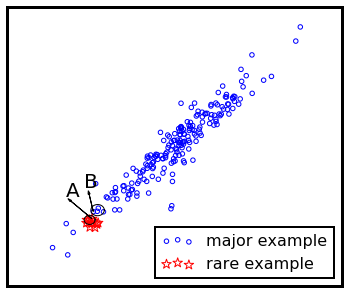

In [40]:

def filter_dataset():
    """选取部分数据集，用于放大画图"""
    orig_dataset = np.loadtxt('synthetic_gauss.txt', dtype=np.float)
    final_dataset = []
    for i in range(0, 200):
        if orig_dataset[i, 0] <= -0.2 and orig_dataset[i, 1] <= 4:
            final_dataset.extend(orig_dataset[i,:])
    final_dataset = np.reshape(np.array(final_dataset), newshape=(len(final_dataset)/3, 3))
    final_dataset = np.append(final_dataset, orig_dataset[200:215, :], axis=0)
    np.savetxt(fname='filter_dataset.txt', X=final_dataset)


def main():
    """ 用多元高斯产生随机数"""
    __file__ = "/home/haiqw/tools/dataset/synthetic_gauss.py"
    file_path = os.path.join( \
            os.path.dirname(os.path.abspath(__file__)), 'synthetic_gauss.txt')
    if not os.path.isfile(file_path):
        major_dataset = multivariate_normal(mean=[1, 5], cov=[[1, 1], [1, 1.1]], size=200)
        major_labels = np.zeros(shape=[200,1], dtype=np.int)
        rare_dataset = multivariate_normal(mean=[-1, 2.8], cov=[[0.01, 0], [0, 0.01]], size=15)
        rare_labels = np.ones(shape=[15,1], dtype=np.int)
        # 最终人工合成数据集
        final_dataset = np.append(np.append(major_dataset, major_labels, axis=1),
                np.append(rare_dataset, rare_labels, axis=1), axis=0)
        np.savetxt(fname='synthetic_gauss.txt', X=final_dataset)
    else:
        final_dataset = np.loadtxt('synthetic_gauss.txt', dtype=np.float)


    # 获取过滤后的数据集合(主要包含稀有类数据点)
    if not os.path.isfile(os.path.dirname(file_path) + '/filter_dataset.txt'):
        filter_dataset()
    filter_dataset = np.loadtxt('filter_dataset.txt')

    # 原始数据分布图
    an = np.linspace(0, 2*np.pi, 100)
    plt.figure(figsize=(6, 5))
    plt.scatter(final_dataset[0:200, 0], final_dataset[0:200, 1], edgecolor='blue', facecolor='', label='major example')
    plt.scatter(final_dataset[200:215, 0], final_dataset[200:215, 1], edgecolor='red', facecolor='', marker='*', s=100, label='rare example')
    plt.plot(0.13*np.cos(an)-1.03, 0.13*np.sin(an)+2.89, c='black')
    plt.plot(0.16*np.cos(an)-0.84, 0.16*np.sin(an)+3.17, c='black')
    plt.arrow(-0.98, 2.93, -0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.arrow(-0.943, 3.13, -0.1, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.text(-1.59, 3.57, 'A', color='k', size=20)
    plt.text(-1.17, 3.81, 'B', color='k', size=20)
    plt.xticks([])
    plt.yticks([])
    legend = plt.legend(loc="lower right", fontsize=16)
    legend.get_frame().set_linewidth(2)
    plt.savefig('/home/haiqw/my_paper/mknn_lp/pic/mknn_lp_mutual_nearest.eps', \
            format='eps', bbox_inches='tight', dpi=1200)
    plt.show()
    # plt.close()

#     # 过滤部分数据后分布图
#     plt.figure(figsize=(6, 5))
#     plt.scatter(filter_dataset[filter_dataset[:, 2] == 0, 0], filter_dataset[filter_dataset[:, 2] == 0, 1], \
#             edgecolor='blue', facecolor='', s=50, label='major example')
#     plt.scatter(filter_dataset[filter_dataset[:, 2] == 1, 0], filter_dataset[filter_dataset[:, 2] == 1, 1], \
#             edgecolor='red', facecolor='', marker='*', s=150, label='major example')
#     plt.plot(0.13*np.cos(an)-1.03, 0.13*np.sin(an)+2.89, c='black', linewidth=1.5)
#     plt.plot(0.16*np.cos(an)-0.84, 0.16*np.sin(an)+3.17, c='black', linewidth=1.5)
#     plt.arrow(-0.98, 2.93, -0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
#     plt.arrow(-0.943, 3.13, -0.1, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
#     plt.text(-1.59, 3.57, 'A', color='k', size=20)
#     plt.text(-1.17, 3.81, 'B', color='k', size=20)
#     plt.xticks([])
#     plt.yticks([])
#     legend = plt.legend(loc="lower right", fontsize=16)
#     legend.get_frame().set_linewidth(2)
#     plt.savefig('/home/haiqw/my_paper/mknn_lp/pic/mknn_lp_mutual_nearest_filter.eps',
#             format='eps', bbox_inches='tight', dpi=1200)


if __name__ == '__main__':
    main()
